## Comparing the standard SST algorithm to microwave SST

### Do FLC events cause a bias in IR-derived SST?

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
mw_path = 'MW_SST/20230407120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc'
mw_ds = xr.open_dataset(mw_path)

noaa_path = 'NOAA_SST/20230407000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc'
noaa_ds = xr.open_dataset(noaa_path)

In [3]:
#---Northeast US
min_lon = -83
min_lat = 26
max_lon = -51
max_lat = 50

In [4]:
mw_ds_crop = mw_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
noaa_ds_crop = noaa_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

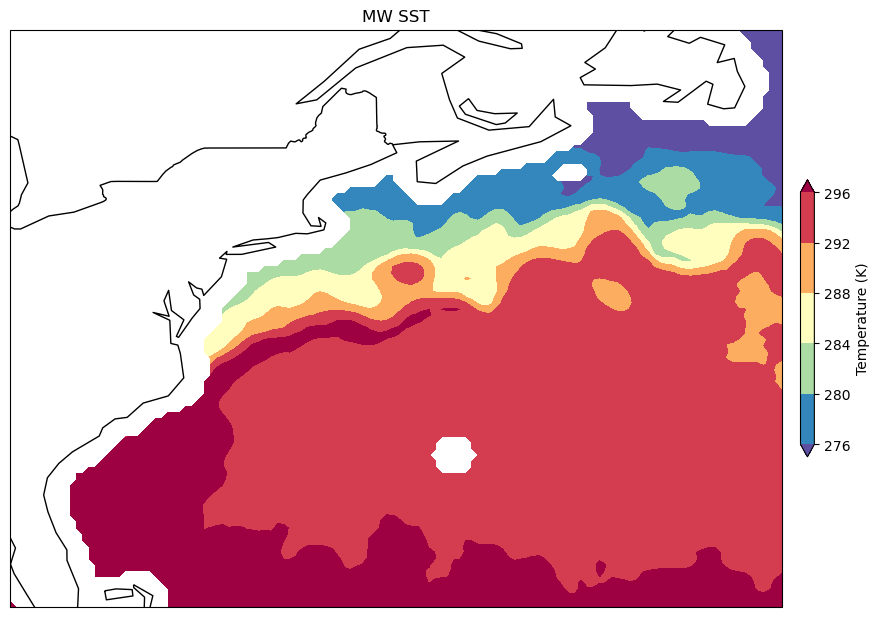

In [5]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r

c=ax.contourf(mw_ds_crop.lon, mw_ds_crop.lat, mw_ds_crop.analysed_sst[0], cmap=cmap, extend='both')
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('MW SST')
clb.set_label('Temperature (K)')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)

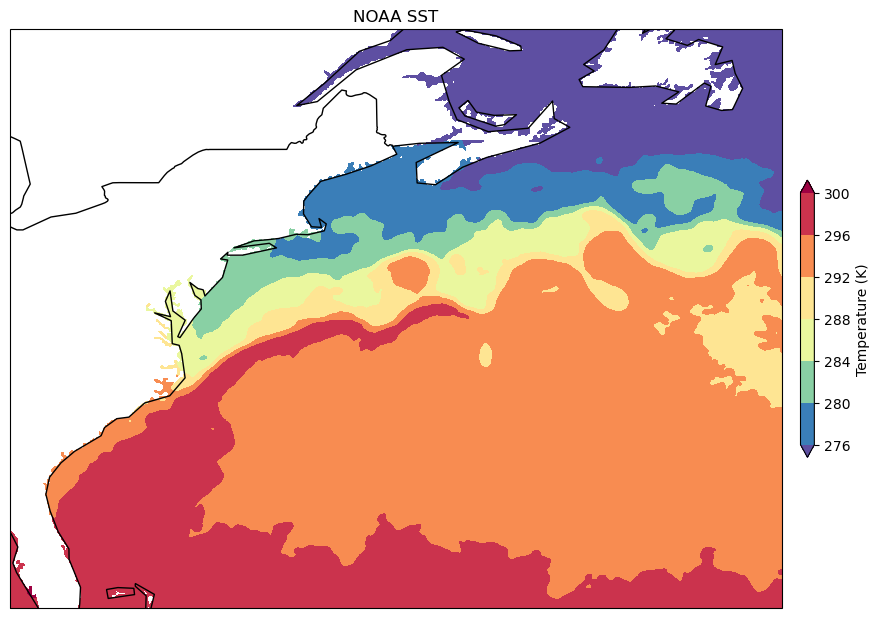

In [6]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r

c=ax.contourf(noaa_ds_crop.lon, noaa_ds_crop.lat, noaa_ds_crop.analysed_sst[0], cmap=cmap, extend='both')
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('NOAA SST')
clb.set_label('Temperature (K)')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)

In [17]:
mw_sst = mw_ds_crop['analysed_sst'].values.flatten()
noaa_sst = noaa_ds_crop['analysed_sst'].values.flatten()

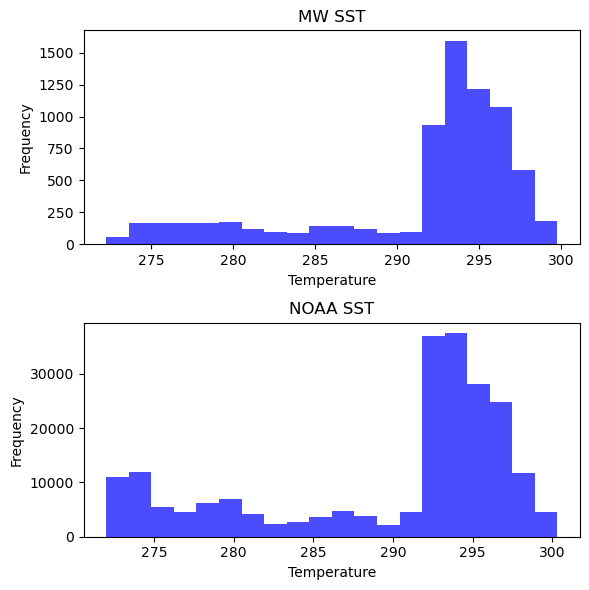

In [22]:
fig,ax=plt.subplots(2, figsize=(6,6))

ax[0].hist(mw_sst, bins=20, color='blue', alpha=0.7)
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Frequency')
ax[0].set_title('MW SST')

ax[1].hist(noaa_sst, bins=20, color='blue', alpha=0.7)
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Frequency')
ax[1].set_title('NOAA SST')

fig.tight_layout()
plt.show()

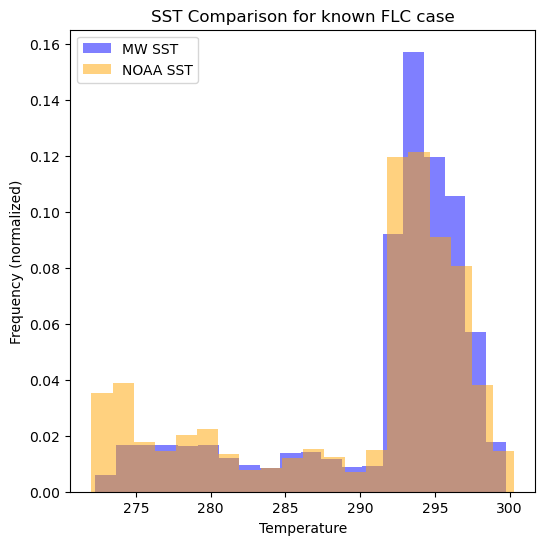

In [27]:
fig,ax=plt.subplots(1, figsize=(6,6))

ax.hist(mw_sst, bins=20, color='blue', alpha=0.5, label='MW SST', density=True)
ax.hist(noaa_sst, bins=20, color='orange', alpha=0.5, label='NOAA SST', density=True)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency (normalized)')
ax.set_title('SST Comparison for known FLC case')

plt.legend()
plt.grid(False)
plt.show()

### Running for a control (non-FLC) case

In [28]:
mw_path = 'MW_SST/20230427120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc'
mw_ds = xr.open_dataset(mw_path)

noaa_path = 'NOAA_SST/20230427000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc'
noaa_ds = xr.open_dataset(noaa_path)

In [29]:
mw_ds_crop_c = mw_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
noaa_ds_crop_c = noaa_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

In [32]:
mw_sst_c = mw_ds_crop_c['analysed_sst'].values.flatten()
noaa_sst_c = noaa_ds_crop_c['analysed_sst'].values.flatten()

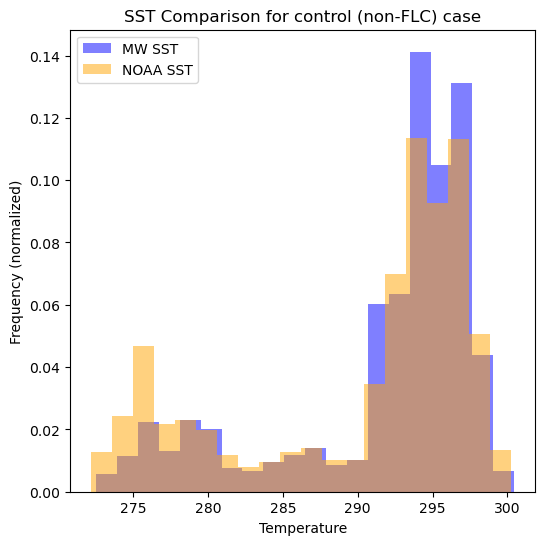

In [33]:
fig,ax=plt.subplots(1, figsize=(6,6))

ax.hist(mw_sst_c, bins=20, color='blue', alpha=0.5, label='MW SST', density=True)
ax.hist(noaa_sst_c, bins=20, color='orange', alpha=0.5, label='NOAA SST', density=True)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency (normalized)')
ax.set_title('SST Comparison for control (non-FLC) case')

plt.legend()
plt.grid(False)
plt.show()